# Implementation of the tensor completion algorithm with EPL

Necessary files: testing_functions.py, tensor_completion_functions.py, pyten.zip, EPL_94.csv, EPL_95.csv, ..., EPL_19.csv

In [ ]:
import testing_functions
import tensor_completion_functions
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import seaborn as sns

I used the implementation of the tensor completion algorithms from the package Pyten: https://github.com/datamllab/pyten.

Importing Pyten.

In [ ]:
!unzip /content/pyten.zip -d /content/pyten

Archive:  /content/pyten.zip
   creating: /content/pyten/pyten/
   creating: /content/pyten/pyten/content/
   creating: /content/pyten/pyten/content/pyten/
   creating: /content/pyten/pyten/content/pyten/pyten/
  inflating: /content/pyten/pyten/content/pyten/pyten/.DS_Store  
   creating: /content/pyten/pyten/content/pyten/pyten/.git/
   creating: /content/pyten/pyten/content/pyten/pyten/.git/branches/
  inflating: /content/pyten/pyten/content/pyten/pyten/.git/config  
  inflating: /content/pyten/pyten/content/pyten/pyten/.git/description  
 extracting: /content/pyten/pyten/content/pyten/pyten/.git/HEAD  
   creating: /content/pyten/pyten/content/pyten/pyten/.git/hooks/
  inflating: /content/pyten/pyten/content/pyten/pyten/.git/hooks/applypatch-msg.sample  
  inflating: /content/pyten/pyten/content/pyten/pyten/.git/hooks/commit-msg.sample  
  inflating: /content/pyten/pyten/content/pyten/pyten/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/pyten/pyten/content/pyten/pyten/

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=49fbd463089253973ef19e0fe2cb0bb7cd1b618840779979c9958d948499fc74
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
!cd pyten/pyten/content/pyten/pyten; pip install .
import pyten

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/pyten/pyten/content/pyten/pyten
  Preparing metadata (setup.py) ... done
  Created wheel for pyten: filename=pyten-1.0.0-py3-none-any.whl size=82191 sha256=267657be08a46a7f7eef66e2a64af79cfed3606a00fd2507b4a276c5eaceea56
  Stored in directory: /tmp/pip-ephem-wheel-cache-nuqgmg4q/wheels/30/44/e3/7ceb1a8149efc872b717846fdef5c8012f25ce729e15498d11
Successfully built pyten


I used seasons from from 1993/94 to first half of 2017/18 season as training dataset and second half of 2017/18 season for validation. The algorithm was tested on the second half of the 2018/19 season.


In [ ]:
train_validation_files = ['EPL_94.csv', 'EPL_95.csv', 'EPL_96.csv', 'EPL_97.csv',
                 'EPL_98.csv', 'EPL_99.csv', 'EPL_00.csv', 'EPL_01.csv',
                 'EPL_02.csv', 'EPL_03.csv', 'EPL_04.csv', 'EPL_05.csv',
                 'EPL_06.csv', 'EPL_07.csv', 'EPL_08.csv', 'EPL_09.csv',
                 'EPL_10.csv', 'EPL_11.csv', 'EPL_12.csv', 'EPL_13.csv',
                 'EPL_14.csv', 'EPL_15.csv', 'EPL_16.csv', 'EPL_17.csv',
                 'EPL_18.csv']

# Iterations

For each algorithm, I was searching for the best maximum number of iterations. I ran the algorithm 20 times for each maximum number of iterations (with other hyperparameters fixed) and measured the variance of the accuracy. I picked the maximum number of iterations with the smallest variance.

In [ ]:
iteration_nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]

Tucker ALS

In [ ]:
scores_tuckerALS = tensor_completion_functions.get_scores_iterations(train_validation_files, 0.5, '1', 1e-10, 0.1, iteration_nums, pyten, r=5, C=0.6)

iterations:  10  scores:  [48.421052631578945, 49.473684210526315, 48.94736842105264, 46.8421052631579, 51.05263157894737, 46.8421052631579, 46.31578947368421, 51.578947368421055, 48.94736842105264, 47.89473684210526, 48.421052631578945, 46.31578947368421, 44.73684210526316, 49.473684210526315, 46.8421052631579, 49.473684210526315, 45.26315789473684, 47.368421052631575, 49.473684210526315, 52.10526315789473]  variance:  3.819252077562326
iterations:  20  scores:  [48.94736842105264, 46.8421052631579, 47.89473684210526, 47.368421052631575, 46.8421052631579, 48.421052631578945, 45.26315789473684, 43.684210526315795, 45.26315789473684, 47.89473684210526, 49.473684210526315, 46.31578947368421, 47.89473684210526, 48.421052631578945, 46.31578947368421, 46.8421052631579, 49.473684210526315, 46.31578947368421, 46.8421052631579, 46.8421052631579]  variance:  2.033240997229913
iterations:  30  scores:  [43.15789473684211, 50.0, 45.26315789473684, 48.94736842105264, 48.94736842105264, 50.52631578

Smallest variance for the Tucker ALS agorithm was achieved with 20 maximum iterations.

In [ ]:
best_iterations_tuckerALS = 20

CP ALS

In [ ]:
scores_CPALS = tensor_completion_functions.get_scores_iterations(train_validation_files, 0.5, '2', 1e-10, 0.1, iteration_nums, pyten, r=5, C=0.6)

/usr/local/lib/python3.7/dist-packages/pyten/tenclass/ktensor.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.Us = np.array(us)


iterations:  10  scores:  [47.89473684210526, 44.21052631578947, 48.94736842105264, 44.21052631578947, 47.89473684210526, 43.684210526315795, 45.78947368421053, 47.368421052631575, 47.368421052631575, 45.26315789473684, 45.26315789473684, 47.368421052631575, 47.368421052631575, 47.368421052631575, 43.684210526315795, 47.368421052631575, 47.368421052631575, 47.89473684210526, 47.368421052631575, 46.31578947368421]  variance:  2.389889196675895
iterations:  20  scores:  [44.73684210526316, 45.26315789473684, 41.05263157894737, 48.94736842105264, 46.8421052631579, 45.78947368421053, 50.526315789473685, 48.94736842105264, 49.473684210526315, 47.89473684210526, 46.8421052631579, 45.78947368421053, 46.31578947368421, 43.684210526315795, 54.21052631578947, 43.15789473684211, 45.78947368421053, 46.31578947368421, 44.73684210526316, 51.578947368421055]  variance:  8.972299168975066
iterations:  30  scores:  [46.31578947368421, 42.10526315789473, 44.73684210526316, 44.73684210526316, 48.94736842

Smallest variance for the CP ALS agorithm was achieved with 4000 maximum iterations.

In [ ]:
best_iterations_CPALS = 4000

TNCP

In [ ]:
scores_TNCP = tensor_completion_functions.get_scores_iterations(train_validation_files, 0.5, '3', 1e-10, 0.1, iteration_nums, pyten, r=5, C=0.6)

iterations:  10  scores:  [46.31578947368421, 45.78947368421053, 48.421052631578945, 50.0, 41.578947368421055, 46.8421052631579, 45.78947368421053, 44.73684210526316, 48.421052631578945, 44.21052631578947, 46.31578947368421, 48.421052631578945, 50.0, 49.473684210526315, 48.421052631578945, 46.8421052631579, 47.89473684210526, 44.73684210526316, 47.89473684210526, 46.8421052631579]  variance:  4.25484764542936
iterations:  20  scores:  [45.26315789473684, 45.78947368421053, 46.31578947368421, 47.368421052631575, 47.89473684210526, 48.94736842105264, 46.31578947368421, 46.8421052631579, 46.8421052631579, 46.8421052631579, 48.94736842105264, 46.31578947368421, 47.89473684210526, 51.578947368421055, 50.0, 47.89473684210526, 46.8421052631579, 46.8421052631579, 45.26315789473684, 44.21052631578947]  variance:  2.8005540166204996
iterations:  30  scores:  [46.31578947368421, 48.94736842105264, 45.78947368421053, 48.94736842105264, 46.31578947368421, 48.421052631578945, 49.473684210526315, 48.

Smallest variance for the TNCP agorithm was achieved with 20 maximum iterations.

In [ ]:
best_iterations_TNCP = 20

SiLRTC

The maximum number of iterations didn't make any difference in the accuracy of SiLRTC, so I chose 100, which is default in Pyten.

In [ ]:
best_iterations_SliRTC = 100

I searched for best hyperparameters for each algorithm. For each hyperparameters combination is the model trained on the training data and evaluated on the second half of the 2017/18 season, which is the validation dataset. The hyperparameter combination with the best validation accuracy is chosen.

Tucker ALS

In [ ]:
param_grid = {
    'threshold': [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25],
    'r': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
param_comb = ParameterGrid(param_grid)

val_scores = []
for params in param_comb:
    # Training on the training dataset and predicting the validation dataset.
    score = tensor_completion_functions.predict_season(train_validation_files, 0.5, '1', 1e-10,
                           best_iterations_tuckerALS, pyten, **params)
    val_scores.append(score)
    print(params, ' ', score)

best_params = param_comb[np.argmax(val_scores)]
print(best_params)
print(np.max(val_scores))

{'r': 2, 'threshold': 0}   0.4263157894736842
{'r': 2, 'threshold': 0.025}   0.4842105263157895
{'r': 2, 'threshold': 0.05}   0.4842105263157895
{'r': 2, 'threshold': 0.075}   0.4
{'r': 2, 'threshold': 0.1}   0.45789473684210524
{'r': 2, 'threshold': 0.125}   0.4
{'r': 2, 'threshold': 0.15}   0.4105263157894737
{'r': 2, 'threshold': 0.175}   0.4052631578947368
{'r': 2, 'threshold': 0.2}   0.38421052631578945
{'r': 2, 'threshold': 0.225}   0.4473684210526316
{'r': 2, 'threshold': 0.25}   0.3684210526315789
{'r': 3, 'threshold': 0}   0.5
{'r': 3, 'threshold': 0.025}   0.49473684210526314
{'r': 3, 'threshold': 0.05}   0.47368421052631576
{'r': 3, 'threshold': 0.075}   0.45789473684210524
{'r': 3, 'threshold': 0.1}   0.46842105263157896
{'r': 3, 'threshold': 0.125}   0.46842105263157896
{'r': 3, 'threshold': 0.15}   0.4631578947368421
{'r': 3, 'threshold': 0.175}   0.4473684210526316
{'r': 3, 'threshold': 0.2}   0.46842105263157896
{'r': 3, 'threshold': 0.225}   0.4421052631578947
{'r': 3,

With Tucker ALS algorithm was the highest validation accuracy achieved with threshold of 0.05 and r of 7.

CP ALS

In [ ]:
param_grid = {
    'threshold': [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25],
    'r': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
param_comb = ParameterGrid(param_grid)

val_scores = []
for params in param_comb:
    # Training on the training dataset and predicting the validation dataset.
    score = tensor_completion_functions.predict_season(train_validation_files, 0.5, '2', 1e-10,
                           best_iterations_CPALS, pyten, **params)
    val_scores.append(score)
    print(params, ' ', score)

best_params = param_comb[np.argmax(val_scores)]
print(best_params)
print(np.max(val_scores))

/usr/local/lib/python3.7/dist-packages/pyten/tenclass/ktensor.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.Us = np.array(us)


{'r': 2, 'threshold': 0}   0.4421052631578947
{'r': 2, 'threshold': 0.025}   0.47368421052631576
{'r': 2, 'threshold': 0.05}   0.4421052631578947
{'r': 2, 'threshold': 0.075}   0.4473684210526316
{'r': 2, 'threshold': 0.1}   0.46842105263157896
{'r': 2, 'threshold': 0.125}   0.46842105263157896
{'r': 2, 'threshold': 0.15}   0.4368421052631579
{'r': 2, 'threshold': 0.175}   0.4421052631578947
{'r': 2, 'threshold': 0.2}   0.4631578947368421
{'r': 2, 'threshold': 0.225}   0.4631578947368421
{'r': 2, 'threshold': 0.25}   0.45789473684210524
{'r': 3, 'threshold': 0}   0.49473684210526314
{'r': 3, 'threshold': 0.025}   0.4368421052631579
{'r': 3, 'threshold': 0.05}   0.49473684210526314
{'r': 3, 'threshold': 0.075}   0.49473684210526314
{'r': 3, 'threshold': 0.1}   0.46842105263157896
{'r': 3, 'threshold': 0.125}   0.4789473684210526
{'r': 3, 'threshold': 0.15}   0.4473684210526316
{'r': 3, 'threshold': 0.175}   0.4368421052631579
{'r': 3, 'threshold': 0.2}   0.5052631578947369
{'r': 3, 'thr

With CP ALS algorithm was the highest validation accuracy achieved with threshold of 0.175 and r of 10.

TNCP

In [ ]:
param_grid = {
    'threshold': [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25],
    'r': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
param_comb = ParameterGrid(param_grid)

val_scores = []
for params in param_comb:
    # Training on the training dataset and predicting the validation dataset.
    score = tensor_completion_functions.predict_season(train_validation_files, 0.5, '3', 1e-10,
                           best_iterations_TNCP, pyten, **params)
    val_scores.append(score)
    print(params, ' ', score)

best_params = param_comb[np.argmax(val_scores)]
print(best_params)
print(np.max(val_scores))

{'r': 2, 'threshold': 0}   0.42105263157894735
{'r': 2, 'threshold': 0.025}   0.4368421052631579
{'r': 2, 'threshold': 0.05}   0.42105263157894735
{'r': 2, 'threshold': 0.075}   0.46842105263157896
{'r': 2, 'threshold': 0.1}   0.4052631578947368
{'r': 2, 'threshold': 0.125}   0.43157894736842106
{'r': 2, 'threshold': 0.15}   0.41578947368421054
{'r': 2, 'threshold': 0.175}   0.4263157894736842
{'r': 2, 'threshold': 0.2}   0.39473684210526316
{'r': 2, 'threshold': 0.225}   0.38421052631578945
{'r': 2, 'threshold': 0.25}   0.39473684210526316
{'r': 3, 'threshold': 0}   0.47368421052631576
{'r': 3, 'threshold': 0.025}   0.4631578947368421
{'r': 3, 'threshold': 0.05}   0.47368421052631576
{'r': 3, 'threshold': 0.075}   0.4842105263157895
{'r': 3, 'threshold': 0.1}   0.43157894736842106
{'r': 3, 'threshold': 0.125}   0.4631578947368421
{'r': 3, 'threshold': 0.15}   0.4052631578947368
{'r': 3, 'threshold': 0.175}   0.4789473684210526
{'r': 3, 'threshold': 0.2}   0.4052631578947368
{'r': 3, '

With TNCP algorithm was the highest validation accuracy achieved with threshold of 0.15 and r of 6.

SiLRTC

In [ ]:
param_grid = {
    'threshold': [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25],
}
param_comb = ParameterGrid(param_grid)

val_scores = []
for params in param_comb:
    # Training on the training dataset and predicting the validation dataset.
    score = tensor_completion_functions.predict_season(train_validation_files, 0.5, '4', 1e-10,
                           best_iterations_SliRTC, pyten, **params)
    val_scores.append(score)
    print(params, ' ', score)

best_params = param_comb[np.argmax(val_scores)]
print(best_params)
print(np.max(val_scores))

{'threshold': 0}   0.47368421052631576
{'threshold': 0.025}   0.49473684210526314
{'threshold': 0.05}   0.4263157894736842
{'threshold': 0.075}   0.43157894736842106
{'threshold': 0.1}   0.4052631578947368
{'threshold': 0.125}   0.41578947368421054
{'threshold': 0.15}   0.3684210526315789
{'threshold': 0.175}   0.3368421052631579
{'threshold': 0.2}   0.3368421052631579
{'threshold': 0.225}   0.3263157894736842
{'threshold': 0.25}   0.32105263157894737
{'threshold': 0.025}
0.49473684210526314


With SilRTC algorithm was the highest validation accuracy achieved with threshold of 0.025.

The best result overall had TNCP algorithm with threshold 0.15 and r 6, so I have chosen this algorithm. For other leagues, I have applied this algorithm as well, but searched for the best hyperparameters again.

In [ ]:
best_function = '3'
best_threshold = 0.15
best_r = 6

I used second half of season 2018/19 as testing dataset. For evaluation on the testing dataset I divided the testing data into rounds approximately. The model is trained on the the training dataset, it is evaluated on one round of the testing dataset and this round is added to the training dataset.

In [ ]:
testing_files = ['EPL_94.csv', 'EPL_95.csv', 'EPL_96.csv', 'EPL_97.csv',
                 'EPL_98.csv', 'EPL_99.csv', 'EPL_00.csv', 'EPL_01.csv',
                 'EPL_02.csv', 'EPL_03.csv', 'EPL_04.csv', 'EPL_05.csv',
                 'EPL_06.csv', 'EPL_07.csv', 'EPL_08.csv', 'EPL_09.csv',
                 'EPL_10.csv', 'EPL_11.csv', 'EPL_12.csv', 'EPL_13.csv',
                 'EPL_14.csv', 'EPL_15.csv', 'EPL_16.csv', 'EPL_17.csv',
                 'EPL_18.csv', 'EPL_19.csv']

In [ ]:
res, cm = tensor_completion_functions.test_season(testing_files, 0.5, best_function, 1e-10, best_iterations_TNCP, best_threshold, pyten, r=best_r, return_cm=True)
res

0.6153846153846154
0.5
0.6363636363636364
0.5833333333333334
0.6363636363636364
0.5833333333333334
0.6875
0.5294117647058824
0.5333333333333333
0.6666666666666666
0.45454545454545453
0.45454545454545453
0.5833333333333334
0.6666666666666666
0.2727272727272727


0.5631578947368421

The testing accuracy is 56.32%.

I ploted the confusion matrix.

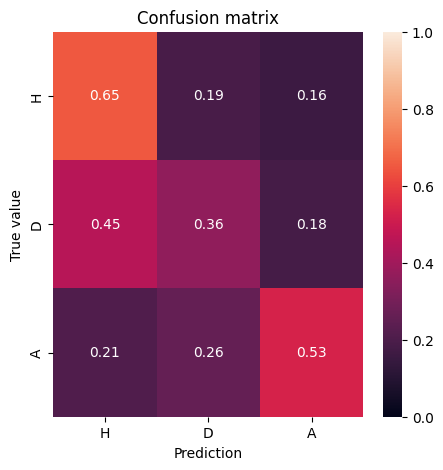

In [ ]:
tensor_completion_functions.plot_cm(cm)

I extracted the feature vectors from the last season of the fullfilled tensor. I experimented, whether it is better to extract the vectors before or after apllying the threshold. I saved the feature matrices  into csv files.

In [ ]:
H, A, teams = tensor_completion_functions.get_svd(train_validation_files, 0.5, best_function, 1e-10, best_iterations_TNCP, best_threshold, pyten, r=best_r)

In [ ]:
tensor_completion_functions.save_matrices(H, A, teams, "H_EPL.csv", "A_EPL.csv")

In [ ]:
H_before_threshold, A_before_threshold, teams = tensor_completion_functions.get_svd(train_validation_files, 0.5, best_function, 1e-10, best_iterations_TNCP, best_threshold, pyten, r=best_r,
                      before_threshold=True)

In [ ]:
tensor_completion_functions.save_matrices(H_before_threshold, A_before_threshold, teams, "H_EPL_before_threshold.csv", "A_EPL_before_threshold.csv")